# Mini proyecto kaggle

In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

In [63]:
tf.config.list_physical_devices('GPU')


[]

In [3]:
hist = []

In [4]:
train = pd.read_csv('./data/train.csv')
evaluetion = pd.read_csv('./data/test.csv')



## 1. Explorar data

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77779 entries, 0 to 77778
Data columns (total 92 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      77779 non-null  int64  
 1   Y       77779 non-null  int64  
 2   V1      77779 non-null  float64
 3   V2      77779 non-null  float64
 4   V3      77779 non-null  int64  
 5   V4      77779 non-null  float64
 6   V5      77779 non-null  float64
 7   V6      77779 non-null  float64
 8   V7      77779 non-null  float64
 9   V8      77779 non-null  float64
 10  V9      77779 non-null  float64
 11  V10     77779 non-null  float64
 12  V11     77779 non-null  float64
 13  V12     77779 non-null  float64
 14  V13     77779 non-null  float64
 15  V14     77779 non-null  float64
 16  V15     77779 non-null  float64
 17  V16     77779 non-null  float64
 18  V17     77779 non-null  float64
 19  V18     77779 non-null  float64
 20  V19     77779 non-null  float64
 21  V20     77779 non-null  float64
 22

Se cuenta cuantas clases hay por columna

In [6]:
len(train['Y'].value_counts())

74

In [7]:
for c in train.columns:
    print(f'{c} = {len(train[c].value_counts())}')

ID = 77779
Y = 74
V1 = 76309
V2 = 75683
V3 = 1
V4 = 77216
V5 = 77119
V6 = 76607
V7 = 77386
V8 = 77034
V9 = 76852
V10 = 76373
V11 = 77483
V12 = 77584
V13 = 77278
V14 = 77750
V15 = 77752
V16 = 77753
V17 = 77736
V18 = 77738
V19 = 77725
V20 = 77716
V21 = 77701
V22 = 77692
V23 = 77692
V24 = 77665
V25 = 77633
V26 = 77740
V27 = 77738
V28 = 77695
V29 = 77673
V30 = 77687
V31 = 77645
V32 = 77616
V33 = 77595
V34 = 77503
V35 = 77461
V36 = 77643
V37 = 77736
V38 = 77737
V39 = 77715
V40 = 77700
V41 = 77663
V42 = 77656
V43 = 77585
V44 = 77456
V45 = 77504
V46 = 77551
V47 = 77732
V48 = 77712
V49 = 77690
V50 = 77652
V51 = 77649
V52 = 77602
V53 = 77584
V54 = 77633
V55 = 77524
V56 = 77711
V57 = 77715
V58 = 77708
V59 = 77702
V60 = 77675
V61 = 77559
V62 = 77554
V63 = 77431
V64 = 77707
V65 = 77697
V66 = 77666
V67 = 77643
V68 = 77629
V69 = 77638
V70 = 77446
V71 = 77712
V72 = 77712
V73 = 77681
V74 = 77608
V75 = 77595
V76 = 77259
V77 = 77711
V78 = 77692
V79 = 77682
V80 = 77672
V81 = 77364
V82 = 77706
V83 = 77669

> V3 podrias ser eliminado ????????????

## 2. Implementar NN

### 2.1 Preparación 

In [75]:
data = train.drop(columns=['ID'])

X = data.drop(columns=['Y']).values
y = data['Y'].values

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalización de las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Escala datos de validavión
data_eval= evaluetion.drop(columns=['ID'])
data_eval = scaler.transform(data_eval)

c:\Users\facio\anaconda3\envs\tfproject\lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


### 2.2 Construcción de modelo

In [77]:

model = Sequential([
    Dense(256, kernel_regularizer=l2(0.01), input_shape=(X_train_scaled.shape[1],)),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(128, kernel_regularizer=l2(0.01)),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.1),
    Dense(32, activation='relu'),
    BatchNormalization(),
    # Dropout(0.1),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='linear') 
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])


In [78]:
# Entrenamiento del modelo
history = model.fit(X_train_scaled, y_train, validation_split=0.3, epochs=150, batch_size=256, verbose=2, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)])

Epoch 1/150
171/171 - 3s - loss: 4005947.0000 - mae: 2001.4622 - val_loss: 3997572.7500 - val_mae: 1999.3719 - 3s/epoch - 16ms/step
Epoch 2/150
171/171 - 1s - loss: 3993747.7500 - mae: 1998.4158 - val_loss: 3983749.7500 - val_mae: 1995.9130 - 900ms/epoch - 5ms/step
Epoch 3/150
171/171 - 1s - loss: 3972373.0000 - mae: 1993.0605 - val_loss: 3959041.2500 - val_mae: 1989.7140 - 868ms/epoch - 5ms/step
Epoch 4/150
171/171 - 1s - loss: 3942042.7500 - mae: 1985.4377 - val_loss: 3924273.5000 - val_mae: 1980.9579 - 903ms/epoch - 5ms/step
Epoch 5/150
171/171 - 1s - loss: 3903309.2500 - mae: 1975.6582 - val_loss: 3879940.0000 - val_mae: 1969.7357 - 861ms/epoch - 5ms/step
Epoch 6/150
171/171 - 1s - loss: 3856794.2500 - mae: 1963.8508 - val_loss: 3831022.0000 - val_mae: 1957.2799 - 850ms/epoch - 5ms/step
Epoch 7/150
171/171 - 1s - loss: 3803128.0000 - mae: 1950.1389 - val_loss: 3774158.0000 - val_mae: 1942.6985 - 868ms/epoch - 5ms/step
Epoch 8/150
171/171 - 1s - loss: 3742924.7500 - mae: 1934.6405 -

In [79]:
# Evaluación del modelo en el conjunto de prueba
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

487/487 [==============================] - 1s 1ms/step - loss: 85.4902 - mae: 5.8500
Test Loss: 85.49017333984375, Test MAE: 5.849975109100342


### 2.3 Visualización

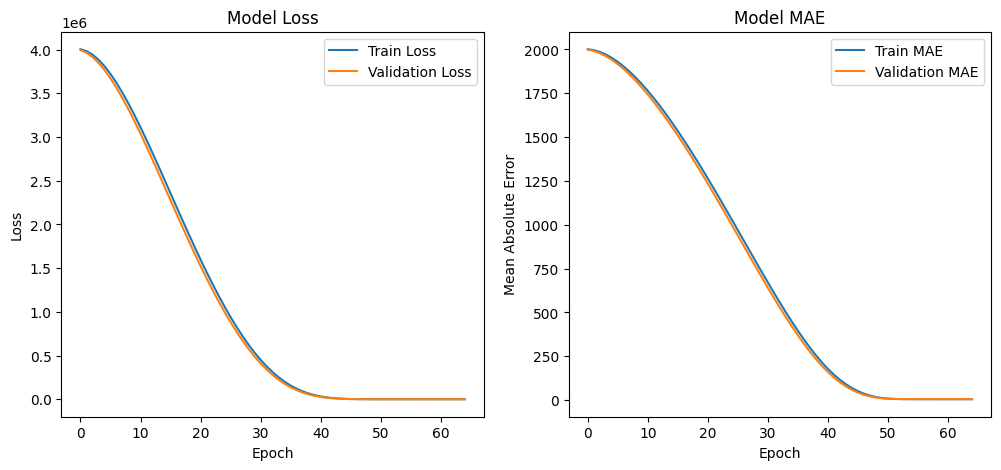

In [12]:
import matplotlib.pyplot as plt

# Gráficos de pérdida y MAE
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend()

plt.show()


# Predicción

In [55]:
def save_data(model, name):
    y_predict = model.predict(data_eval)

    df = evaluetion[['ID']]
    df['Y'] = y_predict
    df.to_csv(f'predict/{name}.csv', index=False)

save_data(model, '4capas2')

584/584 [==============================] - 1s 1ms/step


C:\Users\facio\AppData\Local\Temp\ipykernel_21732\3104163613.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Y'] = y_predict


In [14]:
import pickle

def save_model(model, name):
    with open(f'./models/{name}.pkl', 'wb') as archivo_salida:
        pickle.dump(model, archivo_salida)

save_model(model, 'dropout-sample')

INFO:tensorflow:Assets written to: ram://3359fc89-1a66-46b5-b6f6-ccfaaa825199/assets


In [28]:
hist.append({
    'desc': 'normalizada con 2 podas aumentando porcentaje de poda',
    'mae':  5.797336101531982,
    'mae_kaggle': None # pendiente
})

pd.DataFrame(hist)

,desc,mae,mae_kaggle
0,normalizada con 2 podas aumentando porcentaje ...,5.834270,None
1,normalizada con 2 podas aumentando porcentaje ...,5.797336,None
